
AI ASSIGNMENT 3

SUBMITTED BY: T. MEGHANA, 20MID0127, VIT VELLORE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Birds_dataset.zip'

Archive:  /content/drive/MyDrive/Birds_dataset.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: t

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import cv2 as cv

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

test = test_gen.flow_from_directory('/content/test_data/test_data',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
print(train.class_indices)
print(test.class_indices)

{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}
{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
# CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
Convolution2D(20,(3,3),activation = 'relu',input_shape=(120,120,3)),
MaxPooling2D(2,2),
Flatten(),
Dense(45,activation = 'relu'),
Dense(16,activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train,epochs =10,validation_data = test ,batch_size=5)

Epoch 1/10
19/19 [==============================] - 92s 5s/step - loss: 1.4303 - accuracy: 0.5600 - val_loss: 2.7892 - val_accuracy: 0.2229
Epoch 2/10
19/19 [==============================] - 119s 6s/step - loss: 1.3222 - accuracy: 0.6067 - val_loss: 3.3485 - val_accuracy: 0.1783
Epoch 3/10
19/19 [==============================] - 86s 5s/step - loss: 1.1206 - accuracy: 0.6333 - val_loss: 2.9957 - val_accuracy: 0.2484
Epoch 4/10
19/19 [==============================] - 85s 5s/step - loss: 1.0758 - accuracy: 0.6733 - val_loss: 2.9904 - val_accuracy: 0.1911
Epoch 5/10
19/19 [==============================] - 87s 5s/step - loss: 0.9847 - accuracy: 0.6800 - val_loss: 2.8732 - val_accuracy: 0.2293
Epoch 6/10
19/19 [==============================] - 87s 5s/step - loss: 0.8123 - accuracy: 0.7533 - val_loss: 3.0537 - val_accuracy: 0.1656
Epoch 7/10
19/19 [==============================] - 85s 5s/step - loss: 0.7788 - accuracy: 0.7600 - val_loss: 3.1493 - val_accuracy: 0.1592
Epoch 8/10
19/19 [=

In [ ]:
model.save('birds.h5')

In [ ]:
model_new = tf.keras.models.load_model('/content/birds.h5')

TESTING


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/Eagle.jpg',target_size=(120,120))

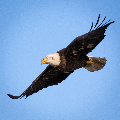

In [ ]:
img


In [ ]:
img = image.img_to_array(img)
img

array([[[102., 157., 221.],
        [102., 153., 218.],
        [ 98., 153., 217.],
        ...,
        [ 97., 155., 219.],
        [ 87., 145., 209.],
        [104., 159., 224.]],

       [[104., 159., 224.],
        [107., 162., 226.],
        [106., 161., 225.],
        ...,
        [ 95., 155., 218.],
        [107., 162., 227.],
        [101., 152., 217.]],

       [[105., 158., 224.],
        [ 98., 153., 217.],
        [104., 159., 223.],
        ...,
        [ 99., 159., 222.],
        [ 98., 153., 218.],
        [ 93., 146., 212.]],

       ...,

       [[120., 169., 228.],
        [117., 169., 227.],
        [120., 171., 228.],
        ...,
        [122., 172., 231.],
        [118., 168., 227.],
        [117., 167., 226.]],

       [[123., 174., 231.],
        [121., 173., 231.],
        [112., 164., 222.],
        ...,
        [114., 164., 223.],
        [119., 169., 228.],
        [120., 170., 229.]],

       [[114., 164., 223.],
        [120., 172., 230.],
        [121., 1

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[102., 157., 221.],
         [102., 153., 218.],
         [ 98., 153., 217.],
         ...,
         [ 97., 155., 219.],
         [ 87., 145., 209.],
         [104., 159., 224.]],

        [[104., 159., 224.],
         [107., 162., 226.],
         [106., 161., 225.],
         ...,
         [ 95., 155., 218.],
         [107., 162., 227.],
         [101., 152., 217.]],

        [[105., 158., 224.],
         [ 98., 153., 217.],
         [104., 159., 223.],
         ...,
         [ 99., 159., 222.],
         [ 98., 153., 218.],
         [ 93., 146., 212.]],

        ...,

        [[120., 169., 228.],
         [117., 169., 227.],
         [120., 171., 228.],
         ...,
         [122., 172., 231.],
         [118., 168., 227.],
         [117., 167., 226.]],

        [[123., 174., 231.],
         [121., 173., 231.],
         [112., 164., 222.],
         ...,
         [114., 164., 223.],
         [119., 169., 228.],
         [120., 170., 229.]],

        [[114., 164., 223.],
       

In [ ]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 136ms/step


7

In [ ]:
output = ['rebimg','wcrsrt','jglowl','ibicrw','mgprob','hsparo',
'indvul','himgri','himbul','gretit','hilpig','cbrtsh',
'cmnmyn','bonegl','brhkyt','blasti']
print(output)


['rebimg', 'wcrsrt', 'jglowl', 'ibicrw', 'mgprob', 'hsparo', 'indvul', 'himgri', 'himbul', 'gretit', 'hilpig', 'cbrtsh', 'cmnmyn', 'bonegl', 'brhkyt', 'blasti']


In [ ]:
img1 = image.load_img("/content/train_data/train_data/mgprob/100_5590.JPG",target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 21ms/step
13
bonegl


In [ ]:
img1 = image.load_img("/content/train_data/train_data/cmnmyn/100_5763.JPG",target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 21ms/step
4
mgprob
